In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sea

In [2]:
suv_data=pd.read_csv("SUV DATASet/suv_data.csv")

In [3]:
suv_data.head(7)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0


## 1. Data Analysis

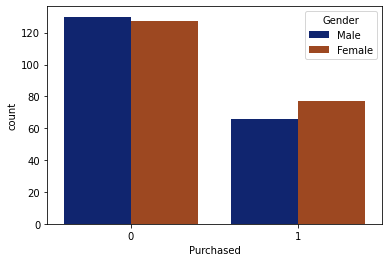

<Figure size 720x576 with 0 Axes>

In [16]:
sea.countplot(x="Purchased", hue="Gender", data=suv_data, palette="dark")
plt.figure(figsize=(10,8))
plt.show()
#plot shows the no. of males and females those bought SUV in the past

<AxesSubplot:xlabel='Age', ylabel='count'>

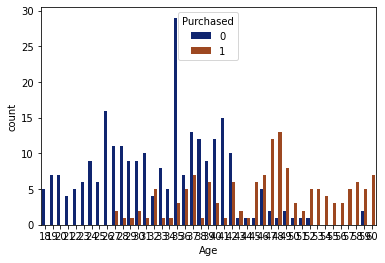

In [20]:
sea.countplot(x="Age", hue="Purchased", data=suv_data, palette="dark")
#plot shows that the Older people tend to buy SUV more as compared to the younger ones

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

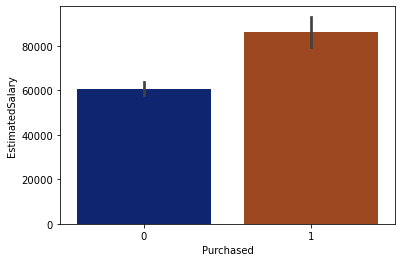

In [27]:
sea.barplot(x="Purchased", y="EstimatedSalary", data=suv_data, palette="dark")
#plot shows that people with more salary tend to purchase an SUV

In [22]:
suv_data.isnull().sum()
#since there are no null values present so there's no need to clean the data

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## 2. Training and testing the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [35]:
X=suv_data.iloc[:,[2,3]].values
#x is the independent variable with AGE and SALARY- multiple variables
Y=suv_data.iloc[:,[4]].values
#y is the depended data that is the PURCHASED column of the dataset

In [36]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.23, random_state=0)


In [37]:
#since the values of the AGE and SALARY are relatively high and complex for the model so we will scale them to smaller values
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [40]:
LR_classifier=LogisticRegression()
LR_classifier.fit(x_train, y_train)


C:\Users\GEETA\Anaconda33\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [42]:
predict=LR_classifier.predict(x_test)

In [43]:
con_mat=confusion_matrix(predict, y_test)
con_mat

array([[61,  6],
       [ 3, 22]], dtype=int64)

In [44]:
accuracy=accuracy_score(predict, y_test)
print(accuracy*100)

90.21739130434783


In [45]:
report= classification_report(predict, y_test)
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93        67\n           1       0.79      0.88      0.83        25\n\n    accuracy                           0.90        92\n   macro avg       0.87      0.90      0.88        92\nweighted avg       0.91      0.90      0.90        92\n'